In [33]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit import Gate
from math import pi
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-10-24 00:44:41,069: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
# Making a controlled Z gate from a CNOT gate
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(0,1)
qc.h(1)
qc.draw()

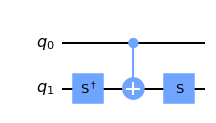

In [27]:
# Making a controlled Y from a CNOT gate
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(1)
qc.cx(0,1)
qc.s(1)
qc.draw()

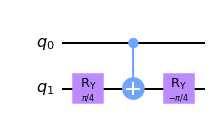

In [30]:
# Making a controlled Hadamard from a CNOT gate
qc = QuantumCircuit(2)
qc.ry(pi/4,1)
qc.cx(0,1)
qc.ry(-pi/4,1)
qc.draw()

In [32]:
#Swapping 2 Qubits
a = 0
b = 1

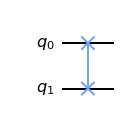

In [33]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b by using the swap gate
qc.swap(a,b)
qc.draw()

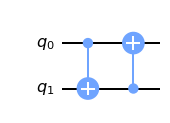

In [34]:
#we can do it via the CNOT gate like this
# case qubit a in state 1 and qubit b in state 0
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw()
# we have now a in state 0 and b in state 1


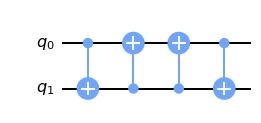

In [35]:
# reverse swap
# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw()

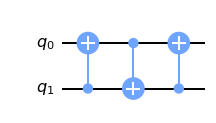

In [36]:
#we can notice that the third gate ( or the first gate depending if we swap from a to b or b to a) has no effect
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

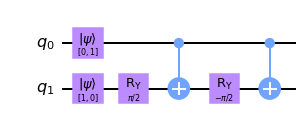

In [30]:
# controlled rotation
qc = QuantumCircuit(2)
qc.initialize([0, 1], 0)
qc.initialize([1, 0], 1)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,1)
qc.cx(0,1)
qc.ry(-theta/2,1)
qc.cx(0,1)
qc.draw()

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


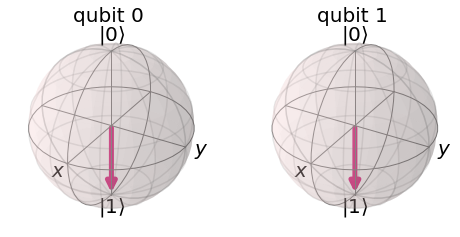

In [31]:
# See Results: we can see the rotation around Y of the second qubit
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

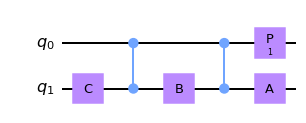

In [35]:
#controlled version of a single qubit rotation V
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit
qc = QuantumCircuit(2)
qc.append(C, [1])
qc.cz(0,1)
qc.append(B, [1])
qc.cz(0,1)
qc.append(A, [1])
qc.p(alpha,0)
qc.draw()

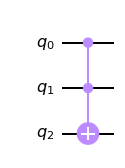

In [36]:
#CCX or Toffoli Gate: a X gat is performed on the third qubit only if qubit 0 and qubit 1 are both in the state 1
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw()

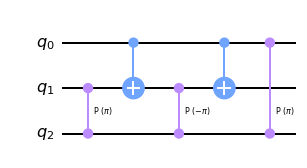

In [37]:
#controlled-controlled-U for any single-qubit rotation U
qc = QuantumCircuit(3)
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw()

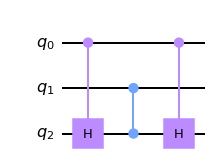

In [38]:
qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw()

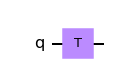

In [39]:
#T gate
qc = QuantumCircuit(1)
qc.t(0) # T gate on qubit 0
qc.draw()

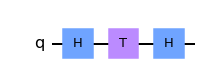

In [40]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()

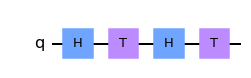

In [41]:

qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw()